<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M1-stats-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd # For general data manipulation in
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for some addittional basic plotting

# Configuring Seaborn for better visuals
sns.set_style("whitegrid")


# Introduction to Statistical Learning for Business Data Science

## What is Statistics?

Statistics is the science of collecting, organizing, analyzing, interpreting, and presenting data. It provides tools for understanding and making decisions in the face of uncertainty.

## Why is Statistics Important in Business and Data-Driven Decision Making?

1. **Informed Decision Making**: With uncertainties in business like market demand fluctuations or changing consumer behaviors, statistics aids in making informed decisions.
2. **Understanding Customers**: Statistical analysis offers insights into customer preferences, behaviors, and needs, facilitating targeted marketing strategies and product developments.
3. **Quality Assurance**: Statistical methods monitor product and service quality, ensuring consistency and customer satisfaction.
4. **Risk Management**: In finance and investments, statistics evaluates risks, guiding investment decisions.
5. **Optimizing Operations**: Statistical models optimize operations, reducing costs, and enhancing efficiency.
6. **Forecasting**: Statistical models predict future values based on historical data, such as sales or stock prices.

# Exploratory Data Analysis (EDA) and Data Visualization

In [83]:
# we can load it from seaborn, since it is one of the integrated demo datasets
data = sns.load_dataset('titanic')



## Understanding the Dataset: Titanic

The Titanic dataset captures details about passengers aboard the RMS Titanic, which sank in 1912. This dataset contains various attributes of passengers, including age, gender, class, fare, and survival status. By understanding the structure and nuances of this dataset, we can extract meaningful insights.

It contains the following variables

1. **PassengerId**: A unique identifier for each passenger.
2. **Survived**: A binary variable indicating whether the passenger survived (1) or not (0).
3. **Pclass**: Passenger class, a proxy for socio-economic status. It has three categories:
   - 1: First class (Upper)
   - 2: Second class (Middle)
   - 3: Third class (Lower)
4. **Name**: Full name of the passenger.
5. **Sex**: Gender of the passenger, either 'male' or 'female'.
6. **Age**: Age of the passenger in years. Some fractional values exist for babies younger than one year.
7. **SibSp**: Number of siblings or spouses aboard the Titanic.
8. **Parch**: Number of parents or children aboard the Titanic.
10. **Fare**: Passenger fare (in British pounds).
11. **Cabin**: Cabin number where the passenger stayed. Note that there are many missing values in this column.
12. **Embarked**: Port of embarkation, indicating where the passenger boarded the Titanic.


In [84]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Data Cleaning and Preprocessing

Before analysis, it's paramount to ensure data integrity:

1. **Handling Missing Data**: Identify and deal with missing values. Depending on the context, we might remove these records, impute them, or use statistical methods.
2. **Data Transformation**: This includes converting data types, creating or modifying features, and rescaling variables.
3. **Outlier Detection**: Detect and address unusual values that might distort the analysis.

## Missing values

In [91]:
# Check for missing values in the dataset
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

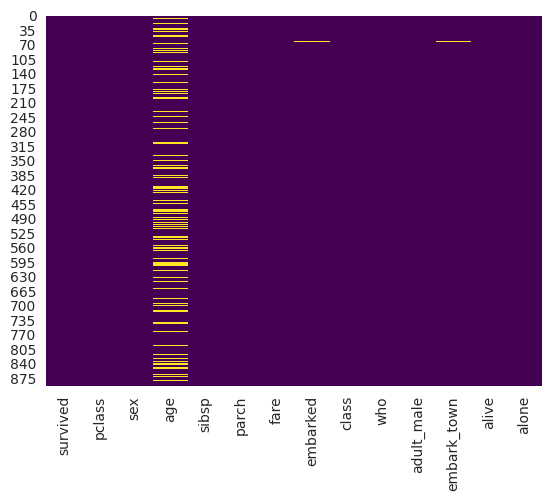

In [92]:
# Visualize the missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [ ]:
# Drop deck
data = data.drop('deck', axis=1)

In [94]:
# Replace missing values with the mean of the respective column
data.fillna(data.mean(), inplace=True)

<ipython-input-94-f3254864483e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


## Data transformation

In [95]:
# Changing datatypes (every KB counts!)
data.sex=data.sex.astype("category")
data.embark_town=data.embark_town.astype("category")
data.embark_town=data.embark_town.astype("category")
data.survived=data.survived.astype("bool")

# Exploratory Data Analysis Analysis

Exploratory Data Analysis, commonly known as EDA, is an essential step in the data analysis pipeline. Before diving into modeling or any intensive computations, it's crucial to understand the nature and structure of your data. EDA is all about making sense of data in hand—before making it useful.

## Why Do We Do EDA?
* Understanding the Data: At its core, EDA is about understanding the characteristics of your dataset. This could mean identifying the distribution of a variable, understanding the relationship between multiple variables, or spotting outliers.
* Informing the Next Steps: The insights you derive from EDA can guide the subsequent questions you ask of your data. For instance, if you spot a trend in your data during EDA, you might decide to investigate its cause.
* Building an Intuitive Sense: EDA helps analysts and stakeholders get a sense of what the data is trying to tell. This 'feel' for the data can't be achieved through statistical tests alone.
* Data Cleaning: EDA often involves identifying and potentially rectifying errors or inconsistencies in data to improve its quality.
* Modeling Considerations: The observations from EDA can inform the type of data transformations required and can guide the modeling process.

## Steps in EDA:
* **Univariate Analysis:** This involves looking at single variables, one at a time. For quantitative data, it could mean studying its central tendency (mean, median, mode) and spread (range, variance, standard deviation). For categorical data, it could involve looking at frequency counts or proportions.
* **Bivariate Analysis:** Here, you're looking at the relationships between two variables. Scatterplots, correlations, and cross-tabulations are common tools for bivariate analysis.
* **Multivariate Analysis:** This involves analyzing more than two variables at the same time. It can help in understanding the interactions between different variables.
* **Summarizing Data:** Once you've explored various facets of your data, it's useful to summarize your findings. This can be a report, a presentation, or a more informal summary.


## Basic Visualizations

Visual tools can simplify data interpretation:

- **Bar Plots**: Great for comparing different categories.
- **Histograms**: Showcase the distribution of a continuous variable.
- **Pie Charts**: Display proportions of categories.
- **Scatter Plots**: Depict relationships between two continuous variables.

## Hands-on: Dive into Visualizations


![](https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png)

Text(0.5, 1.0, 'Distribution of Passenger Ages')

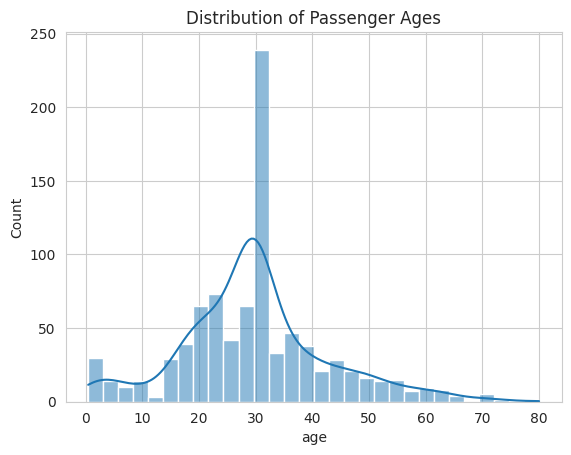

In [107]:
# Distribution of passenger ages
sns.histplot(data=data, x='age', kde=True, bins=30).set_title('Distribution of Passenger Ages')

Text(0.5, 1.0, 'Survival Rates Among Classes')

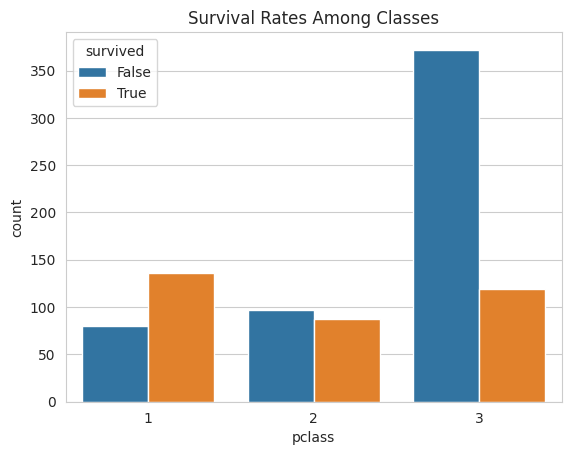

In [108]:
# Survival rates among classes
sns.countplot(data=data, x='pclass', hue='survived').set_title('Survival Rates Among Classes')

Text(0.5, 1.0, 'Gender Distribution of Passengers')

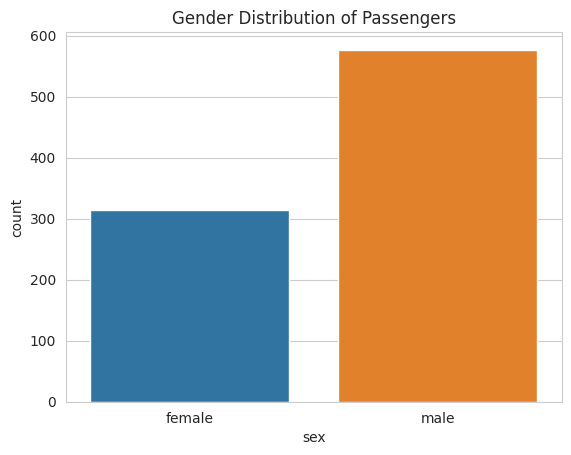

In [109]:

# Gender distribution of passengers
sns.countplot(data=data, x='sex').set_title('Gender Distribution of Passengers')

Text(0.5, 1.0, 'Survival Based on Gender')

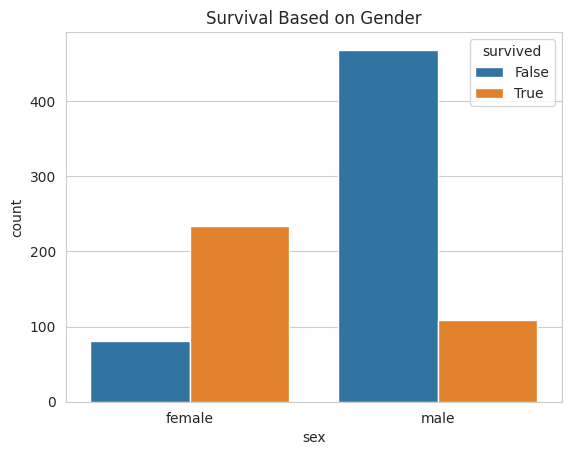

In [110]:
# Survival based on gender
sns.countplot(data=data, x='sex', hue='survived').set_title('Survival Based on Gender')

Text(0.5, 1.0, 'Distribution of Fare')

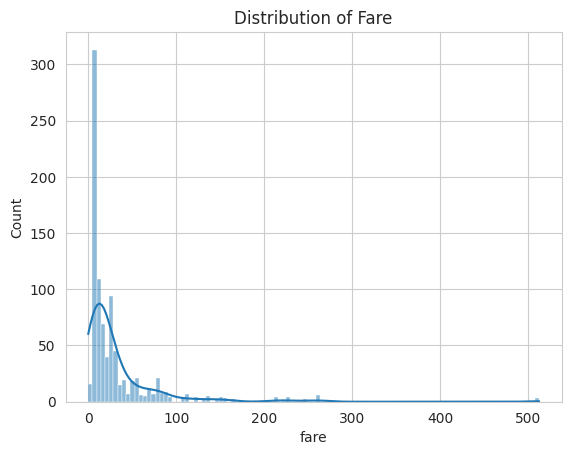

In [111]:
# Fare distribution
sns.histplot(data=data, x='fare', kde=True).set_title('Distribution of Fare')

Text(0.5, 1.0, 'Age vs. Fare with Survival Hue')

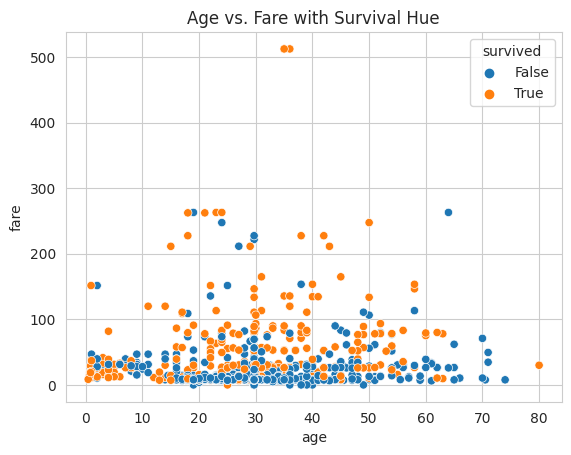

In [112]:
# Age vs. Fare with Survival hue
sns.scatterplot(data=data, x='age', y='fare', hue='survived').set_title('Age vs. Fare with Survival Hue')


### Insights from Visualizations

- The majority of passengers are in the age range of 20-30.
- Class 3 has the highest number of passengers but a lower survival rate.
- The number of male passengers is higher than female passengers, but females have a higher survival rate.
- Most passengers paid a fare of less than $100.
- There's no distinct pattern when plotting Age vs. Fare, but it's evident that some high-fare passengers survived.

Through extensive EDA and visualization, we unearth underlying patterns in the dataset. These insights pave the way for further statistical analysis and hypothesis testing.



# Descriptive Statistics

Descriptive statistics provide a brief summary of a dataset, allowing us to understand its primary characteristics without making further interpretations.

Descriptive statistics provide a concise summary of the main characteristics of a dataset. They offer a quick snapshot of the data's main features and give a broad overview of the dataset's contents.

#### Why Use Descriptive Statistics?

1. **Simplification**: Datasets can be vast. Descriptive statistics simplify them, making it easier to understand the main features of the data.
2. **Summarization**: They offer a way to present a condensed overview of the dataset. Large amounts of data are distilled into key metrics, allowing for quicker interpretations.  
3. **Comparison**: Descriptive statistics can be used to compare different datasets or different segments of a dataset.
4. **Identifying Patterns**: Trends, variations, and anomalies in data can often be detected using descriptive statistics.


## Measures of Central Tendency: Mean, Median, Mode

These measures offer insights into the "center" of the data:

- **Mean ($\bar{X}$)**: The average of all data points.
- **Median**: The middle value in a dataset when ordered from smallest to largest.
- **Mode**: The value(s) that appear most frequently in a dataset.


In [113]:
# Calculating measures of central tendency for Age
mean_age = data['age'].mean()
median_age = data['age'].median()
mode_age = data['age'].mode()[0]

In [114]:
mean_age, median_age, mode_age

(29.69911764705882, 29.69911764705882, 29.69911764705882)

While the mean gives a general idea of the data distribution, it can be influenced by outliers. The median, being the middle value, is more resistant to outliers. The mode, on the other hand, can be useful in understanding the most frequent values in the dataset.


## Measures of Spread: Range, Variance, Standard Deviation

These measures provide an idea of the data's spread:

- **Range**: Difference between the highest ($X_{	ext{max}}$) and lowest ($X_{	ext{min}}$) values.
- **Variance ($\sigma^2$)**: Measures the dispersion of a set of data points around their mean.
- **Standard Deviation ($\sigma$)**: Square root of the variance, representing the average distance between each data point and the mean.


In [115]:
# Calculating measures of spread for Age
range_age = data['age'].max() - data['age'].min()

In [116]:
variance_age = data['age'].var()

In [117]:
std_dev_age = data['age'].std()

In [118]:
range_age, variance_age, std_dev_age

(79.58, 169.0523999372108, 13.002015226002882)

## Measures of Shape

   - **Skewness**: A measure of the asymmetry of the data. Positive values indicate the tail on the right side (larger values) is longer than the left side, the distribution is said to be positively skewed. This indicates that the data has more values concentrated on the left side.
   - **Kurtosis**: A measure of the "tailedness" of the data. Positive Kurtosis indicates a distribution with heavier tails and a sharper peak than the normal distribution.

In [36]:
# Calculate kurtosis
age_kurtosis = data['age'].kurtosis()

# Calculate skewness
age_skewness = data['age'].skew()

In [103]:
age_kurtosis, age_skewness

(0.17827415364210353, 0.38910778230082704)

## Measures of Position


The **Interquartile Range**, commonly denoted as IQR, is a measure of statistical dispersion or spread, representing the difference between the upper and lower quartiles. In simpler terms, IQR indicates the range within which the central 50% of values lie.

1. **Robustness**: Unlike range (which considers the absolute highest and lowest values), IQR only looks at the spread of the middle 50%, making it less susceptible to outliers and extreme values.
2. **Spread of Central Data**: While measures like variance or standard deviation provide an overall spread, IQR specifically gives insight into the spread of the central 50% of data.
3. **Identifying Outliers**: The IQR can be used to identify potential outliers. Any value that is below $( Q1 - 1.5 \times \text{IQR} )$ or above $( Q3 + 1.5 \times \text{IQR} )$ is generally considered an outlier.

Where:
- $( Q1 )$ represents the first quartile or the 25th percentile.
- $( Q3 )$ represents the third quartile or the 75th percentile.

In essence, the IQR provides a measure of where the bulk of the values lie in a dataset, ignoring extreme values.

In [104]:
# Calculate Q1 and Q3
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)

In [119]:
# Calculate IQR
IQR_age = Q3_age - Q1_age

IQR_age

13.0

In [120]:
# Most descriptive statistics all together
data.describe().T # T stands for transpose, pass the include='all' parameter to see categorial values

,count,mean,std,min,25%,50%,75%,max
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


### Identifying Outliers Using Z-score

The Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. It's measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 indicates a value that is one standard deviation from the mean, and so on.


$[Z = \frac{X - \mu}{\sigma}]$

Where:
- $Z$ is the Z-score.
- $X$ is the value of the data point.
- $\mu$ is the mean of the dataset.
- $\sigma$ is the standard deviation of the dataset.

Typically, data points with a Z-score value greater than 3 or less than -3 are considered outliers. This is based on the empirical rule (or 68-95-99.7 rule) which states that:
- About 68% of the data falls within one standard deviation.
- About 95% falls within two standard deviations.
- About 99.7% falls within three standard deviations.

So, data points that fall beyond three standard deviations can be considered rare or outliers.


In [134]:
from scipy.stats import zscore

In [141]:
# Calculate Z-scores
z_scores = zscore(data['age'])

# Get boolean array indicating the presence of outliers
data['outlier_age'] = (z_scores > 3) | (z_scores < -3)

In [142]:
# Drop the outliers based on the 'outlier' column
data_cleaned = data[~data['outlier_age']]


## Confidence Intervals

A confidence interval (CI) provides a range within which a population parameter is likely to fall based on a sample from that population. It's a way to quantify the uncertainty around a sample estimate.

### Key Concepts:

- **Point Estimate**: A single value (usually a sample mean) used to approximate a population parameter.
- **Margin of Error**: The range within which the population parameter is likely to fall.


Mathematically, for a 95% confidence interval around a sample mean ($\bar{x}$ ) from a normally-distributed population with a known standard deviation ($ \sigma$), the CI is defined as:

$\bar{x} \pm 1.96 \times \left( \frac{\sigma}{\sqrt{n}} \right $

Where:
- ( $\bar{x}$ ) is the sample mean.
- ( $\sigma$ ) is the population standard deviation.
- ( $n$ ) is the sample size.

The term ( $1.96$ ) is the Z-score for a 95% confidence level. For other confidence levels, this value will change.

It's important to note that a 95% confidence interval means that if we were to take many samples and build a confidence interval from each of them, we expect about 95% of those intervals to contain the true population parameter.


For instance, a 95% confidence interval suggests that if we were to take many samples and build a CI for each of them, 95% of the intervals would contain the true population parameter.


In [143]:
import scipy.stats as stats

In [144]:
# Calculate the mean and standard error
mean_age = data['age'].mean()
se_age = stats.sem(data['age'])

In [145]:
# Calculate the 95% CI
ci = stats.t.interval(0.95, len(ages)-1, loc=mean_age, scale=se_age)
ci

(28.84422630138378, 30.55400899273386)

Now your turn:

* Create the confidence interval for fare
* Create the confidence interval for fare conditional to survival.
* Discuss how it changes, and what might be the reason.


## Visualization of Statistical Features


### Histogram and probability density function (PDF)

Text(0.5, 1.0, 'Distribution of Passenger Ages')

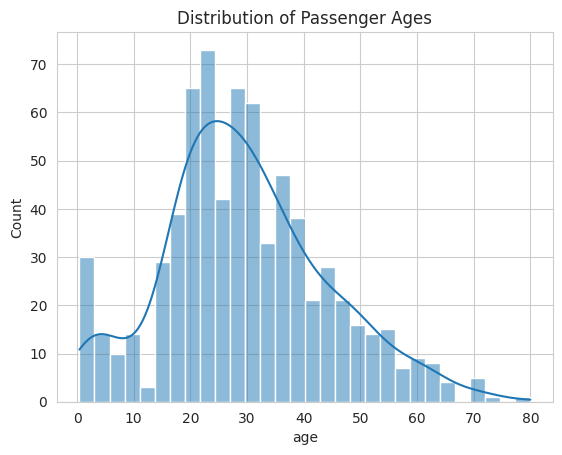

In [30]:
# Visualizing the distribution of Age
sns.histplot(data=data, x='age', kde=True, bins=30).set_title('Distribution of Passenger Ages')

Text(0.5, 1.0, 'Distribution of Passenger Ages by srvival')

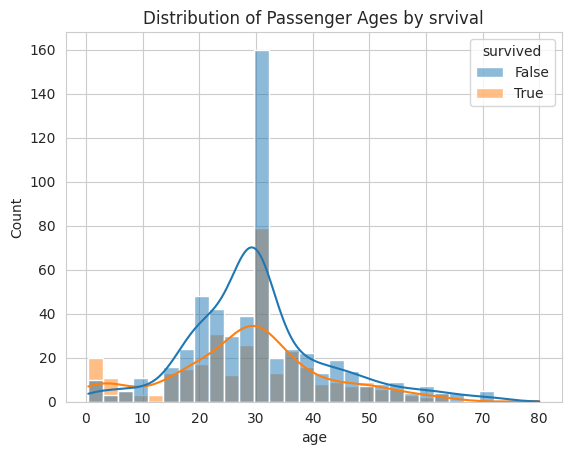

In [124]:
# Visualizing the distribution of Age
sns.histplot(data=data, x='age', hue = 'survived', kde=True, bins=30).set_title('Distribution of Passenger Ages by srvival')

Text(0.5, 1.0, 'Cummulative Distribution of Passenger Age')

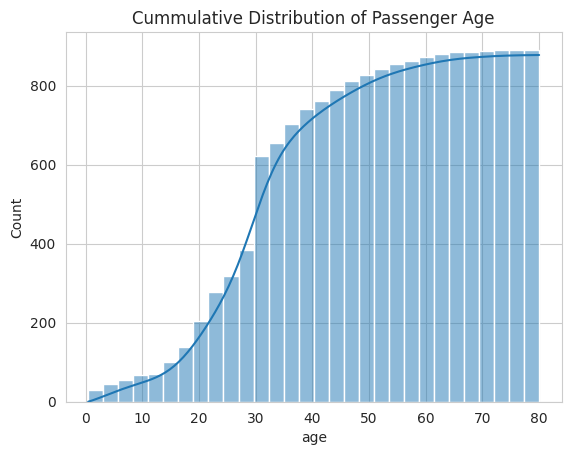

In [126]:
# Visualizing the distribution of Age as cumulative probability density (CPD)
sns.histplot(data=data, x='age', cumulative = True, kde=True, bins=30).set_title('Cummulative Distribution of Passenger Age')

### Boxplot for statistical spread

![](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

Text(0.5, 1.0, 'Box Plot of Passenger Ages')

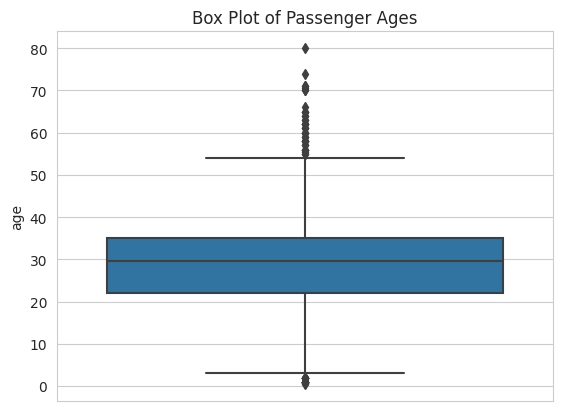

In [122]:
sns.boxplot(data=data, y='age').set_title('Box Plot of Passenger Ages')

Text(0.5, 1.0, 'Box Plot of Passenger Ages')

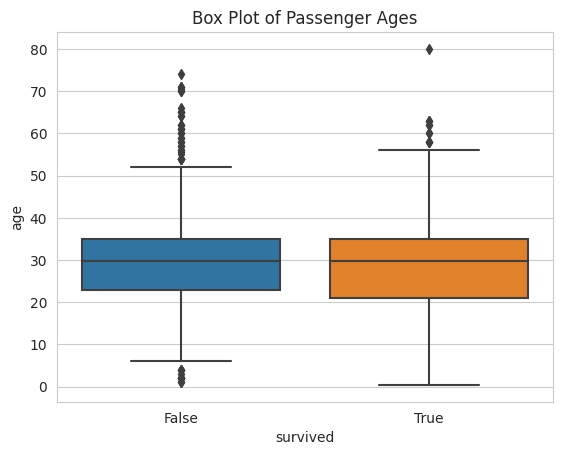

In [123]:
sns.boxplot(data=data, y='age', x = 'survived').set_title('Box Plot of Passenger Ages')

### Your turn

Try to solve the following:
1. explore how the measures of centrality, position, and spread of contineous variables changes conditional to survival. Interpret and argue.


# Probability Theory 101

Probability is a measure that quantifies the likelihood of an event occurring. In the context of statistics and data science, understanding probability is essential for making predictions and informed decisions.

#### Basic Concepts of Probability

- **Experiment**: A procedure that yields an outcome.
- **Sample Space ($ S $)**: The set of all possible outcomes of an experiment.
- **Event**: A subset of the sample space.

The probability of an event $ E $ is denoted by $ P(E) $ and is always between 0 and 1, inclusive.




#### Simple probability
Refers to the probability of an event without any condition.
Probability of an event X, P(X) is given by
$P(X) = \frac{Number \, of \, observations \, in \, favor \, of \, an \, event \, X}{Total \, Number \, of \, observations}$





#### Joint Probability
Refers to the probability of occurrence involving two or more events.
Let A and B be the two events in a sample space. Then the joint probability if the two events denoted by $P(A \, \cap \, B)$, is given by
$P(A \cap B) = \frac{Number \, of \, observations \, in \, A \,\cap \, B } {Total \, Number \, of \, observations}$



#### Conditional Probability
Refers to the probability of event A, given information about the occurrence of another event B. Probability of A given B is written as $P(A \mid B)$.

$P(A \mid B) = \frac{P(A \, and \, B)}{P(B)}$

where
* $P(A \mid B)$ — joint probability of A and B;
* $P(B)$ — probability of B

In [45]:
tab_prob = pd.crosstab(data.pclass, data.survived, margins=True, # Adding margins (Subtotals on the ends)
            margins_name="Totals")
tab_prob

survived,0,1,Totals
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
Totals,549,342,891


### Your turn

Please try calculating the following: Compute the probability of

* ... a randomly chosen passenger surviving?
* ... a randomly chosen passenger being from the first class?
* ... a randomly chosen passenger surviving and being from the first class?
* ... a surviving passenger being from the first class?
* ... a passenger from the first class surviving?
* ... a female passenger class surviving?
* ... a female passenger from the first class surviving?



# Probability Distributions 101

A probability distribution describes how probabilities are distributed over the values of a random variable.

- **Discrete Probability Distribution**: Used when the set of possible outcomes is discrete. E.g., the Binomial and Poisson distributions. (more on th)
- **Continuous Probability Distribution**: Used for continuous random variables. E.g., the Normal distribution.

#### Normal Distribution

The Normal or Gaussian distribution is one of the most important in statistics due to the Central Limit Theorem. It is defined by two parameters: mean ($ \mu $) and standard deviation ($ \sigma $).

Properties:

- Symmetrical bell shape.
- Mean, median, and mode are all equal.
- Approximately 68% of data falls within $ \mu \pm \sigma $, 95% within $ \mu \pm 2\sigma $, and 99.7% within $ \mu \pm 3\sigma $.

![](https://analystprep.com/cfa-level-1-exam/wp-content/uploads/2019/10/page-123.jpg)

<ipython-input-54-c586de2327c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], label='Age', shade=True).set_title('Distribution of Age')


Text(0.5, 1.0, 'Distribution of Age')

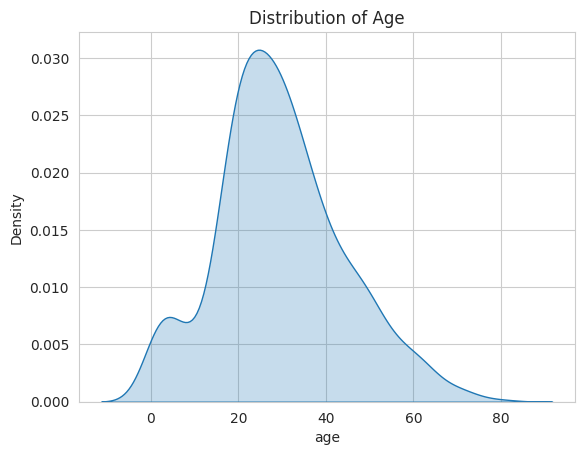

In [54]:
# Visualizing the distribution of Age and Fare
sns.kdeplot(data['age'], label='Age', shade=True).set_title('Distribution of Age')


# Sampling and Central Limit Theorem

## Sampling

Sampling is the process of selecting a subset (a statistical sample) of individuals from a statistical population to estimate characteristics of the whole population. Proper sampling methods ensure that the sample is representative of the entire population.

Types of Sampling:
- **Random Sampling**: Every individual has an equal chance of being selected.
- **Stratified Sampling**: The population is divided into subgroups (strata) and random samples are taken from each stratum.
- **Cluster Sampling**: The population is divided into clusters, and a random sample of clusters is selected.

#### Central Limit Theorem (CLT)

The Central Limit Theorem is a fundamental theorem in probability theory and statistics. It states:

For a sufficiently large sample size, the distribution of the sample mean will approximate a normal distribution, regardless of the distribution of the population from which the sample was drawn.

Properties:
- The mean of the sample mean is equal to the population mean.
- The standard deviation of the sample mean is equal to the population standard deviation divided by the square root of the sample size.


In [ ]:
sample_means = []

# Taking 1000 samples, each of size 50
for _ in range(1000):
    sample = data['age'].sample(50)
    sample_means.append(sample.mean())

Text(0.5, 1.0, 'Distribution of Sample (Age)')

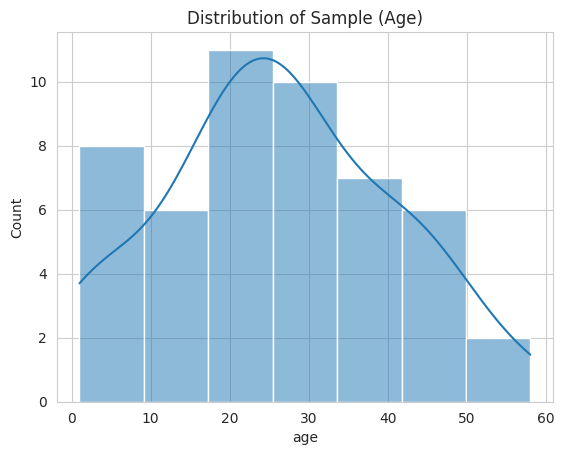

In [ ]:
sns.histplot(sample, kde=True).set_title('Distribution of Sample (Age)')

Text(0.5, 1.0, 'Distribution of Sample Means (Age)')

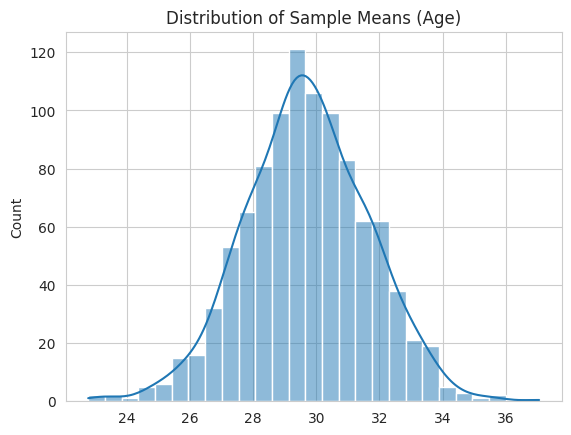

In [ ]:
# Plotting the distribution of sample means
sns.histplot(sample_means, kde=True).set_title('Distribution of Sample Means (Age)')


# Hypothesis Testing

Hypothesis testing is a statistical method used to make decisions about populations based on sample data. It's a fundamental concept in inferential statistics.

## Steps in Hypothesis Testing:

1. **Setting Hypotheses**:
    - ( $ H_0 $): Null hypothesis (a statement that there is no effect or no difference).
    - ($ H_1 $): Alternative hypothesis (what you want to prove).

2. **Choose a Significance Level (($ \alpha $))**: Typically set at 0.05. It represents the probability of rejecting the null hypothesis when it is true.

3. **Collect and Analyze Data**: Calculate a test statistic based on sample data.

4. **Decision Making**: Compare the test statistic to a critical value and decide whether to reject the null hypothesis.


## t-test

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is based on the t-distribution, which is similar to the normal distribution but varies based on the sample size. The t-test is commonly used when the data samples have a small size and unknown population variances.

### Types of t-tests:

1. **One-sample t-test**: This test checks if the mean of a single sample of scores is significantly different from a known or hypothesized population mean.

2. **Two-sample t-test**: This test compares the means of two independent samples. It's used to determine if two sample means are drawn from the same population.

3. **Paired-sample t-test**: This test compares means from the same group at different times. For instance, it could be used to test the effect of a drug, by comparing scores before and after its administration to the same group.

### Assumptions:

For the t-test to produce valid results, certain assumptions need to be met:

1. **Independence of Observations**: The observations between groups should be independent of each other.
  
2. **Normal Distribution**: The data should be approximately normally distributed. This assumption can be relaxed when the sample size is large.
  
3. **Homogeneity of Variances**: The variances of the two groups should be equal, especially for a two-sample t-test.

### Interpreting the t-test:

The output of a t-test will provide a t-statistic and a p-value.

- **t-statistic**: It tells you how much the groups being tested differ in terms of their means.
  
- **p-value**: This tells you the probability of observing the obtained results (or something more extreme) if the null hypothesis were true.

If the p-value is below a predetermined threshold (commonly 0.05), then the difference between groups is considered statistically significant.

In essence, the t-test provides a way to compare the means of two groups and determine if the observed differences are statistically significant or if they could have occurred by random chance.


In [56]:
from scipy.stats import ttest_ind

In [146]:
male_ages = data[data['sex'] == 'male']['age']
female_ages = data[data['sex'] == 'female']['age']

In [147]:
t_stat, p_val = ttest_ind(male_ages, female_ages)
t_stat, p_val

(2.5180596509816655, 0.011974983006826145)


### Chi-Squared Tests

The chi-squared test is a statistical hypothesis test that determines whether there's a significant association between categorical variables. It's a test for independence in a contingency table.

#### Key Concepts:

- **Observed Frequencies**: The actual counts in the dataset.
- **Expected Frequencies**: The counts we'd expect if there was no association between the variables.

The chi-squared statistic is calculated as:

$ \chi^2 = \sum \frac{(O - E)^2}{E} $
Where \$O$ is the observed frequency and $E$ is the expected frequency.


In [148]:
from scipy.stats import chi2_contingency

In [150]:
# Creating a contingency table
contingency_table = pd.crosstab(data['sex'], data['survived'])

In [151]:
# Performing the chi-squared test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
chi2_stat, p_val

(260.71702016732104, 1.1973570627755645e-58)


### ANOVA (Analysis of Variance)

ANOVA is a statistical method used to analyze differences among group means by examining the variances within samples. It's particularly useful when comparing the means of more than two groups.

#### Key Concepts:

- **Between-group Variability**: Differences between group means.
- **Within-group Variability**: Variability within each group.

The primary hypothesis in ANOVA is:

- $H_0$: All group means are equal.
- $H_1$: At least one group mean is different from the others.


In [152]:
# Extracting data for each class
class1 = data[data['pclass'] == 1]['age'].dropna()
class2 = data[data['pclass'] == 2]['age'].dropna()
class3 = data[data['pclass'] == 3]['age'].dropna()

In [153]:
# Performing ANOVA
f_stat, p_val = stats.f_oneway(class1, class2, class3)
f_stat, p_val

(56.57438528337172, 7.481182472787439e-24)

# Correlation & Regression


### Correlation and Association

Correlation refers to any statistical relationship, whether causal or not, between two random variables or bivariate data. It's essential for understanding how one variable may predict another.

#### Pearson's Correlation Coefficient ($ r $)

This coefficient measures the linear relationship between two datasets. The values range between -1 and 1:

- $ r = 1 $ implies a perfect positive linear relationship.
- $ r = -1 $ implies a perfect negative linear relationship.
- $ r = 0 $ implies no linear relationship.

#### Spearman's Rank Correlation

While Pearson's correlation assesses linear relationships, Spearman's correlation evaluates monotonic relationships (whether linear or not) using ranks.


In [154]:
correlation_matrix = data[['age', 'fare', 'pclass', 'parch', 'survived']].corr()

Text(0.5, 1.0, 'Correlation Matrix of Titanic Attributes')

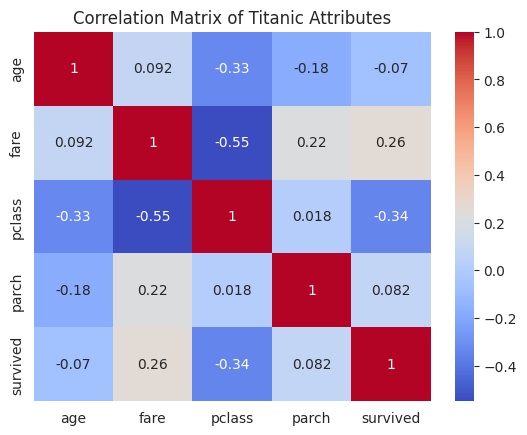

In [155]:
# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of Titanic Attributes')


## Regression Analysis

Regression analysis is a statistical tool used to understand and quantify the relationship between variables. It's beneficial for forecasting and establishing cause-and-effect relationships.

### Linear Regression

Given \( y \) as the dependent variable and \( x \) as the independent variable, the relationship is:
\[ y = eta_0 + eta_1 x + \epsilon \]
Where:
    - \( eta_0 \) is the intercept.
    - \( eta_1 \) is the slope.
    - \( \epsilon \) is the error term.


In [162]:
import statsmodels.api as sm

In [163]:
data_cleaned = data[['age', 'fare']].dropna()
X = data_cleaned['age']
y = data_cleaned['fare']
X = sm.add_constant(X)

In [164]:
model = sm.OLS(y, X)

In [165]:
result = model.fit()

In [166]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.517
Date:                Wed, 30 Aug 2023   Prob (F-statistic):            0.00624
Time:                        12:30:52   Log-Likelihood:                -4740.2
No. Observations:                 891   AIC:                             9484.
Df Residuals:                     889   BIC:                             9494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8106      4.138      5.271      0.000      13.689      29.932
age            0.3500      0.128      2.742      0.006       0.099       0.600
==============================================================================
Omnibus:                      905.522   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44593.316
Skew:                           4.785   Prob(JB):                         0.00
Kurtosis:                      36.310   Cond. No.                         80.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions of OLS Regression

Ordinary Least Squares (OLS) is a method used in linear regression that estimates the parameters by minimizing the sum of the squared residuals. For the results of OLS regression to be trustworthy, certain assumptions need to be met:

1. **Linearity**: The relationship between independent and dependent variables should be linear. This can be checked using scatter plots.

2. **Independence**: Observations should be independent of each other. For time series data, this is often checked using the Durbin-Watson test.

3. **Homoscedasticity (Equal Variance)**: The variance of the residuals should be consistent across all levels of the independent variables. This can be visually checked using a residuals vs. fitted values plot.

4. **No Multicollinearity**: Independent variables should not be too highly correlated with each other. Variance Inflation Factors (VIF) can be used to check this.

5. **No Autocorrelation**: The residuals should not be autocorrelated. As mentioned above, the Durbin-Watson test can be used for this.

6. **Normality of Residuals**: The residuals should be approximately normally distributed. This can be checked using a Q-Q plot or statistical tests like the Shapiro-Wilk test.

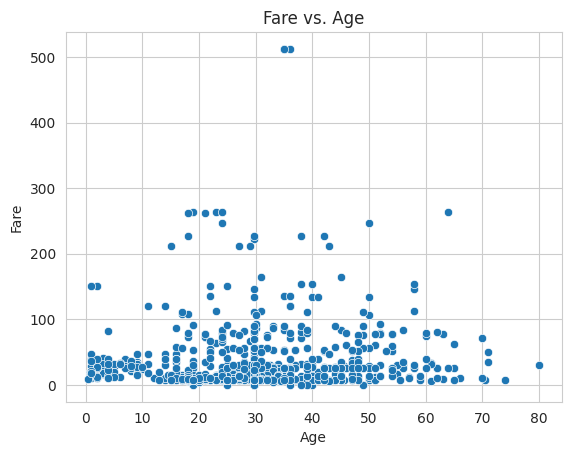

In [175]:
# 1. Scatter plot to check linearity
sns.scatterplot(x=data['age'], y=data_cleaned['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs. Age')
plt.show()

In [176]:
# 2. Independence: For the independence assumption, the Durbin-Watson test can be used, especially for time series data.
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(result.resid)
durbinWatson

# Interpretation: A Durbin-Watson value between 1.5 and 2.5 indicates that there is no auto-correlation in the data.
# If it's < 1.5, there might be positive auto-correlation, and > 2.5 suggests negative auto-correlation.

2.017406582411103

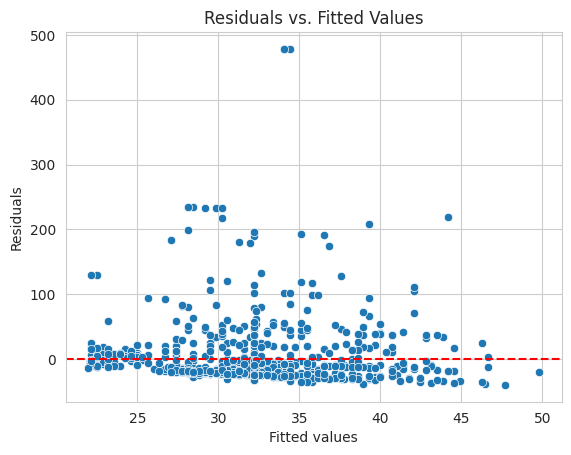

In [177]:
# 3. Residuals vs. Fitted values plot for Homoscedasticity
sns.scatterplot(x=result.fittedvalues, y=result.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Interpretation: If the points are randomly dispersed around the horizontal axis, the assumption is satisfied.

In [178]:
# 4. No Multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For multiple independent variables, the Variance Inflation Factor (VIF) can check multicollinearity.
# Note: This requires multiple independent variables.
# For this example, let's consider 'Age' and 'Fare' as independent variables and calculate VIF for them.

# Add constant to the data
data_vif = data[['age', 'fare']]
data_vif = sm.add_constant(data_vif)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(data_vif.shape[1])]

vif_data

# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

,Variable,VIF
0,const,6.417885
1,age,1.008455
2,fare,1.008455


In [ ]:
# 5. No Autocorrelation:
# As mentioned previously, the Durbin-Watson test can be used.

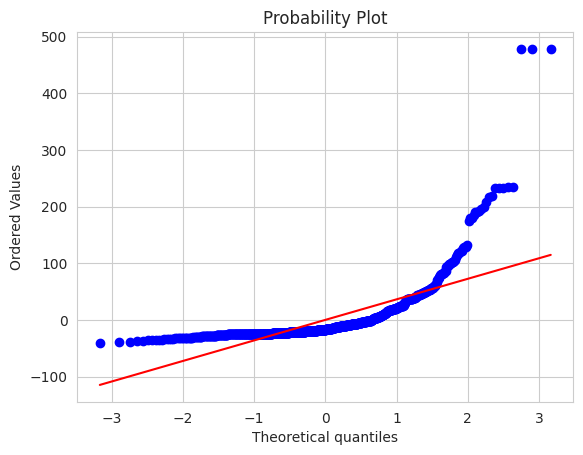

In [179]:
# 6. Normality of Residuals:
from scipy.stats import shapiro
from scipy.stats import probplot
# Q-Q plots and the Shapiro-Wilk test can check this.

# Q-Q plot
probplot(result.resid, plot=plt)
plt.show()
# Interpretation: For the Q-Q plot, if the points lie roughly along the red line, the residuals are normally distributed.

In [180]:
# Shapiro-Wilk Test
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
shapiro_test_stat, shapiro_p_value
# For the Shapiro-Wilk test, a p-value less than 0.05 indicates the residuals are not normally distributed.

(0.5374763011932373, 3.363116314379561e-43)


# Conclusion and Importance of Statistics in Data Science

Data science is an interdisciplinary field that uses various techniques, algorithms, processes, and systems to extract knowledge and insights from structured and unstructured data. At its core, statistics provides the foundational tools and techniques to make sense of data.

## Key Takeaways:

1. **Informed Decision Making**: With the tools and techniques of statistics, businesses can make data-driven decisions, ensuring better outcomes and more efficient processes.
  
2. **Understanding Trends**: Statistical analysis allows us to identify patterns and trends in data, which can lead to more effective strategies and business models.
  
3. **Risk Management**: By understanding the underlying distributions and variances in data, businesses can better assess risks and uncertainties.
  
4. **Model Building**: The core of many machine learning algorithms rests on statistical principles. Understanding these can lead to better model selection and evaluation.
  
5. **Validation of Findings**: Statistical tests allow data scientists to validate their findings, ensuring that the results are not just by random chance but have statistical significance.

In essence, while data science is vast, encompassing various domains like machine learning, artificial intelligence, and deep learning, statistics remains its backbone. Having a strong grasp of statistical concepts is crucial for anyone venturing into the data science field.
